<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/Complex_Models_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
data = fetch_california_housing()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 42)

In [6]:
x_train.shape, x_val.shape, x_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [7]:
import pandas as pd

In [8]:
x_train_df = pd.DataFrame(x_train, columns = data.feature_names)

In [10]:
x_train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

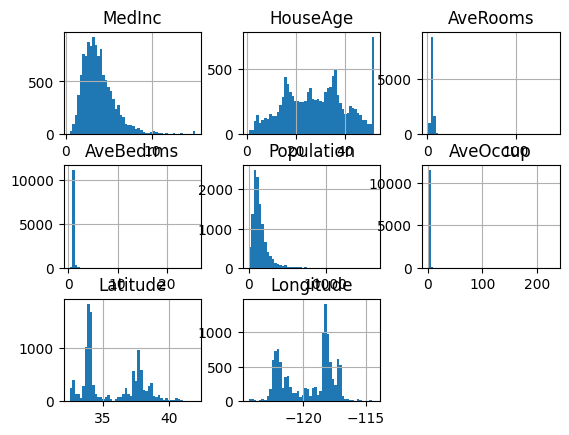

In [14]:
x_train_df.hist(bins = 50)

<Axes: >

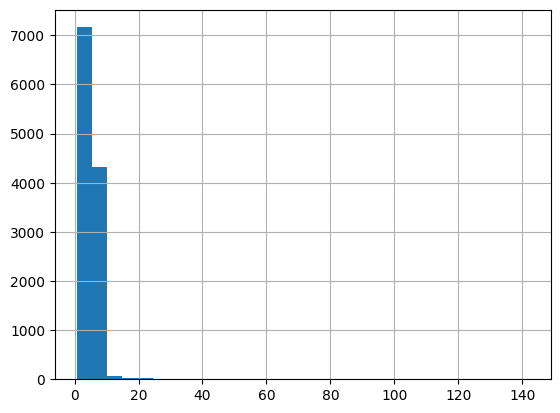

In [13]:
x_train_df.AveRooms.hist(bins=30)

In [59]:
mms = StandardScaler()#MinMaxScaler()


In [60]:
mms.fit(x_train)

x_train_norm = mms.transform(x_train)
x_test_norm = mms.transform(x_test)
x_val_norm = mms.transform(x_val)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

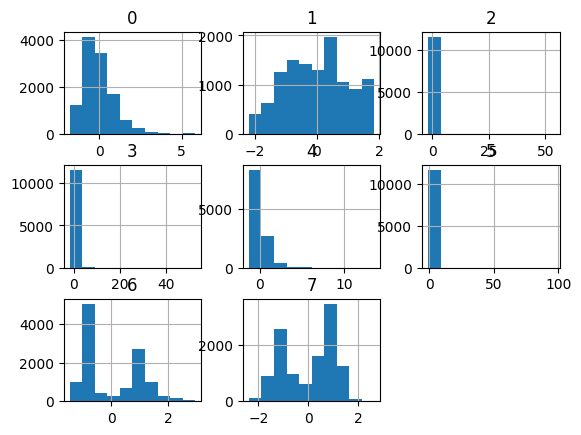

In [61]:
pd.DataFrame(x_train_norm).hist()

## Create model using Functional API

In [62]:
import tensorflow as tf
from tensorflow import keras

In [63]:
x_train.shape

(11610, 8)

In [64]:
input = keras.layers.Input(shape =x_train.shape[1])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1, activation = 'relu')(concat)

model = keras.models.Model(inputs = [input], outputs = [output])

In [65]:
model.compile(optimizer='sgd', loss = 'mse')

In [51]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           270         ['input_3[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 30)           930         ['dense_6[0][0]']                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 38)           0           ['input_3[0][0]',                
                                                                  'dense_7[0][0]']          

In [68]:
model.layers[2].output_shape

(None, 30)

In [69]:
model.layers[0].output_shape

[(None, 8)]

In [81]:
model.layers[4].input_shape

(None, 38)

In [52]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)

In [53]:
history = model.fit(
    x_train_norm, y_train, 
    epochs = 100, 
    validation_data= (x_val_norm, y_val),
    callbacks = [ES])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6791 - val_loss: 0.4154
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4301 - val_loss: 0.3856
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4086 - val_loss: 0.3685
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3842 - val_loss: 0.3912
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4473 - val_loss: 0.3761
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4085 - val_loss: 0.3598
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3841 - val_loss: 0.3502
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3732 - val_loss: 0.3541
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3640 - val_loss: 0.3499
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3573 - val_lo

<Axes: >

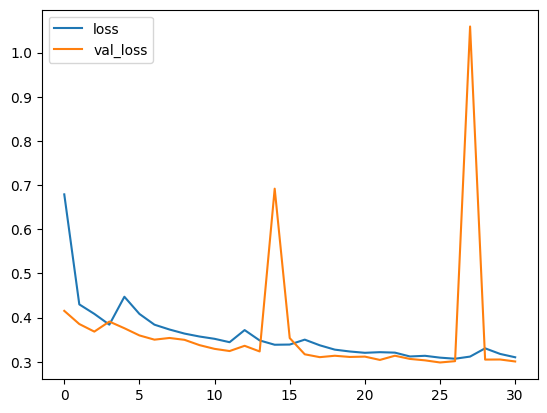

In [54]:
pd.DataFrame(history.history).plot()

In [71]:
import numpy as np

In [74]:
t1 = tf.constant(np.ones(shape = [5,8]))
t1

<tf.Tensor: shape=(5, 8), dtype=float64, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])>

In [76]:
t2 = tf.constant(np.ones(shape = [2, 30])+1)
t2

<tf.Tensor: shape=(2, 30), dtype=float64, numpy=
array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])>

In [78]:
t1[0]

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([1., 1., 1., 1., 1., 1., 1., 1.])>

In [79]:
cont = keras.layers.concatenate([t1[0],t2[0]])

In [80]:
cont

<tf.Tensor: shape=(38,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2.], dtype=float32)>